In [15]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.ticker import ScalarFormatter
from matplotlib.animation import FuncAnimation
import pandas as pd
from scipy.interpolate import UnivariateSpline
from matplotlib.font_manager import FontProperties
from scipy.interpolate import make_interp_spline
from scipy.ndimage import gaussian_filter1d

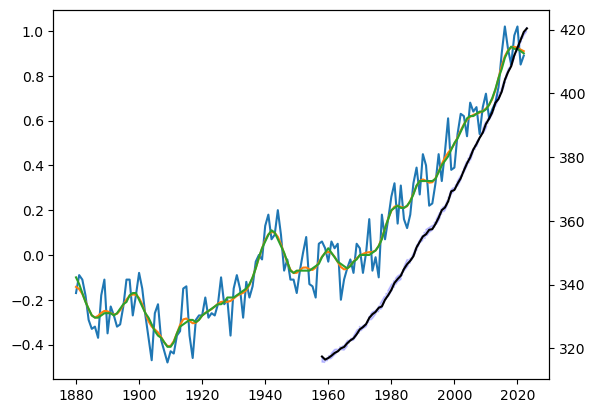

In [22]:
nasa_data_co2 = pd.read_csv('NASA co2_mm_mlo.csv')
temp_anomaly = pd.read_csv('Annual_Surface_Temperature_Change NASA.csv')

x1 = nasa_data_co2['year']
y1 = nasa_data_co2['average_yearly']
y1_lower = nasa_data_co2['min_month_value']
y1_upper = nasa_data_co2['max_month_value']
world_temperature_change = temp_anomaly['No_Smoothing']
world_temperature_change_years = temp_anomaly['Year']
lowess_smoothing = temp_anomaly['Lowess']
gaussian_weighted_avg = gaussian_filter1d(world_temperature_change, sigma=2)

#Putting the 2 together 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(x1, y1, color = 'black')
ax1.plot(world_temperature_change_years, world_temperature_change, label='Temperature Change')
ax1.plot(world_temperature_change_years, gaussian_weighted_avg, label='Gaussian Weighted Avg')
ax1.plot(world_temperature_change_years, lowess_smoothing,label='Lowess Smoothing' )
ax2.fill_between(x1, y1_lower, y1_upper, alpha=0.2,
                 antialiased=True, linewidth=1, linestyle='dashdot', color='blue')
plt.show()


In [14]:
#Script to further clean NASA data 
# import csv 

# year_data = dict()
# with open("NASA co2_mm_mlo.csv",'r', newline='') as csvfile:
#     next(csvfile)
#     reader = csv.reader(csvfile, delimiter=",")
#     for row in reader:
#         year = row[0]
#         temp = float(row[3])

#         if year in year_data:
#             year_data[year].append(temp)
#         else:
#             year_data[year] = [temp]

# for year, data in year_data.items():
#     min_value = min(data)
#     avg_value = sum(data)/len(data)
#     max_value = max(data)
#     data = [min_value, avg_value, max_value]

# with open("NASA co2_mm_mlo.csv", 'w', newline='') as csvfile:
#     csvfile.write("year, min_month_value, average_yearly, max_month_value\n")
#     for year, data in year_data.items():
#         csvfile.write(f"{int(year)}, {data[0]}, {data[1]}, {data[2]}\n")

{'1958': [315.7, 317.45, 317.51, 317.24, 315.86, 314.93, 313.2, 312.43, 313.33, 314.67], '1959': [315.58, 316.48, 316.65, 317.72, 318.29, 318.15, 316.54, 314.8, 313.84, 313.33, 314.81, 315.58], '1960': [316.43, 316.98, 317.58, 319.03, 320.04, 319.59, 318.18, 315.9, 314.17, 313.83, 315.0, 316.19], '1961': [316.89, 317.7, 318.54, 319.48, 320.58, 319.77, 318.57, 316.79, 314.99, 315.31, 316.1, 317.01], '1962': [317.94, 318.55, 319.68, 320.57, 321.02, 320.62, 319.61, 317.4, 316.25, 315.42, 316.69, 317.7], '1963': [318.74, 319.07, 319.86, 321.38, 322.25, 321.48, 319.74, 317.77, 316.21, 315.99, 317.07, 318.35], '1964': [319.57, 320.01, 320.74, 321.84, 322.26, 321.89, 320.44, 318.69, 316.7, 316.87, 317.68, 318.71], '1965': [319.44, 320.44, 320.89, 322.14, 322.17, 321.87, 321.21, 318.87, 317.81, 317.3, 318.87, 319.42], '1966': [320.62, 321.6, 322.39, 323.7, 324.08, 323.75, 322.38, 320.36, 318.64, 318.1, 319.78, 321.03], '1967': [322.33, 322.5, 323.04, 324.42, 325.0, 324.09, 322.54, 320.92, 319.